In [54]:
import json
with open("../measure_data/2022-11-28/POLL.json") as f:
    poll = json.load(f)

In [1]:
from cachedipinfo import fastwhois
FastWhois = fastwhois.fastwhois()

In [5]:
len(FastWhois.localData)

866

In [9]:
import requests
import json
def onlineIntactGeo( ip):
    geoapi = "http://ip.zxinc.org/api.php?type=json&ip="
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:78.0) Gecko/20100101 Firefox/78.0'}
    url = geoapi + ip
    r = requests.get(url,headers=headers)
    s = json.loads(r.text[0:])
    return s

a = onlineIntactGeo('59.51.78.210')
a

{'code': 0,
 'data': {'myip': '2001:da8:ff:212::11:1',
  'ip': {'query': '59.51.78.210', 'start': '', 'end': ''},
  'location': '湖南省 电信DNS服务器',
  'country': '湖南省',
  'local': '电信DNS服务器'}}

In [2]:
FastWhois.query_intactgeo("59.51.78.210")

{'ip_seg': '59.51.0.0/17',
 'net_name': 'CHINANET-HN',
 'inetnum': '59.51.0.0-59.51.127.255',
 'geo': '湖南省 电信DNS服务器'}

In [1]:
from nettopo import topobuild
NetTopo = topobuild.topobuild()

In [61]:
pairs1 = set()
pairs2 = set()
for p in poll:
    pair = p['monitor'] + '-' + p['dect_ip']
    if '.' in pair:
        if pair in NetTopo.localData:
            pairs1.add(pair)
        else:
            pairs2.add(pair)
print(len(pairs1), len(pairs2))

1402 313


In [47]:
with open("../measure_data/2022-11-28/MTR.json") as f:
    mtr = json.load(f)

In [48]:
for m in mtr:
    if (':' in m['monitor']) ^ (':' not in m['dest_ip']):
        NetTopo.mtr2topo(m)
NetTopo.update()

In [49]:
len(NetTopo.localData)

5227

In [50]:
cnt4 = cnt6 = 0
for key in NetTopo.localData:
    if ":" in key:
        cnt6 += 1
    if "." in key:
        cnt4 += 1
print(cnt4, cnt6)

3068 2159


308 315


(array([116.,  32.,  20.,  18.,  13.,  13.,   8.,  16.,  22.,  12.,   9.,
         10.,   7.,   4.,   2.,   2.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   3.02,   5.04,   7.06,   9.08,  11.1 ,  13.12,  15.14,
         17.16,  19.18,  21.2 ,  23.22,  25.24,  27.26,  29.28,  31.3 ,
         33.32,  35.34,  37.36,  39.38,  41.4 ,  43.42,  45.44,  47.46,
         49.48,  51.5 ,  53.52,  55.54,  57.56,  59.58,  61.6 ,  63.62,
         65.64,  67.66,  69.68,  71.7 ,  73.72,  75.74,  77.76,  79.78,
         81.8 ,  83.82,  85.84,  87.86,  89.88,  91.9 ,  93.92,  95.94,
         97.96,  99.98, 102.  ]),
 <BarContainer object of 50 artists>)

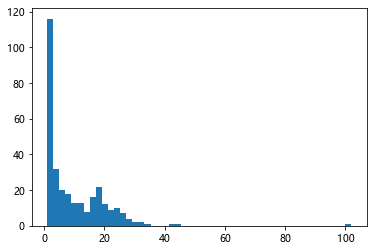

In [53]:
ms = set()
ds = set()
mcnt = {}
for key in NetTopo.localData:
    if "." in key:
        m, d = key.split("-")
        if m in mcnt:
            mcnt[m] += 1
        else:
            mcnt[m] = 1
        ms.add(m)
        ds.add(d)
print(len(ms), len(ds))
mc = []
for m in mcnt:
    mc.append(mcnt[m])
from matplotlib import pyplot as plt
plt.hist(mc, bins = 50)

In [1]:
from anomalydetection import detection

In [2]:
d = detection.timingdetection()

In [3]:
from dataagg import aggregation

In [4]:
c = aggregation.aggregation(datauri="POLL.json", alldata=True, metric="all_time")
xy = c.overallAgg()

In [5]:
tooBig, tooSmall = d.gaussDetect(xy)

In [6]:
d.tooBigInfo(tooBig, "all_time")

The following are the too big measurements (mean:181.1999536486219, std:15.61170150123155):
2022-11-09 20:02:30: all_time is 239.66967305524238
2022-11-09 21:27:30: all_time is 259.45762711864404
2022-11-09 21:32:30: all_time is 274.97522522522524
2022-11-09 21:37:30: all_time is 288.5819209039548
2022-11-09 21:47:30: all_time is 252.43799772468714


In [8]:
d.tooSmallInfo(tooSmall, "all_time")

The following are the too small measurements (mean:181.1999536486219, std:15.61170150123155):


In [4]:
import numpy as np
xy = np.array(xy)

In [5]:
x = xy[:,0]
y = xy[:,1]

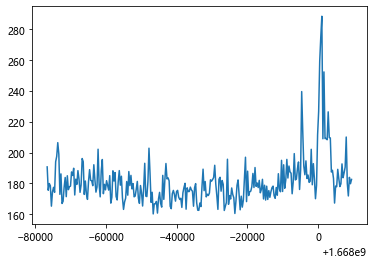

In [6]:
from matplotlib import pyplot as plt
plt.plot(x,y)

In [7]:
xy2 = c.regionAgg(ipversion=4, region="北京")

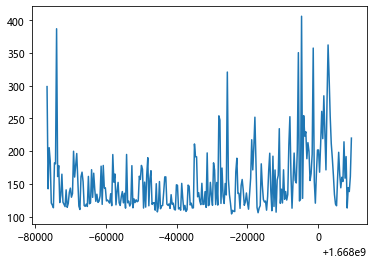

In [8]:
xy2 = np.array(xy2)
x = xy2[:,0]
y = xy2[:,1]
plt.plot(x,y)

In [12]:
xy3 = c.e2eAgg(sip='240e:928:101:0:0:0:0:d', dip='240e:604:204:900::1e')

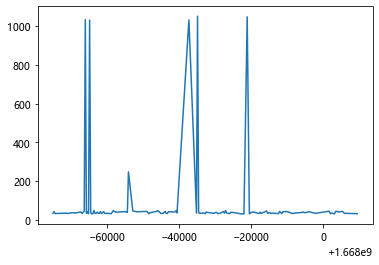

In [13]:
xy3 = np.array(xy3)
x = xy3[:,0]
y = xy3[:,1]
plt.plot(x,y)

In [2]:
a = aggregation.database("POLL.json")
filedata = a.filedata()

In [3]:
len(filedata)

529148

In [28]:
filedata[0]

{'code': '9',
 'down_time': '0',
 'all_time': '10010',
 'dect_ip': '117.184.157.103',
 'monitor': '42.157.197.165',
 'file_size': '0',
 'redirect_time': '0',
 'ssl_time': '0',
 'dns_time': '80',
 'dns_ip': '202.96.128.166',
 'port': '443',
 'connect_time': '9930',
 'dest_ip': '117.184.157.103',
 'host': 'vald.rtcp.icbc.com.cn',
 'response_time': '0',
 'collect_time': '1668009591000',
 'status': '0',
 'collect_date': '2022-11-09'}

In [1]:
from cachedipinfo import fastwhois
b = fastwhois.fastwhois()

In [2]:
b.localSegSearch('222.218.0.0')

'222.218.0.0/15'

In [3]:
b.localSegSearch("1.68.0.0")

'1.68.0.0/14'

In [7]:
b.sortedIPv6Seg

['2402:f000::/32', '2408:8000::/20', '2409:8000::/20', '240e::/20']

In [15]:
for key in b.localData:
    if b.localData[key]["ip_seg"] == "":
        print(key)

In [15]:
import requests
import json
geoapi = "http://ip.zxinc.org/api.php?type=json&ip="
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:78.0) Gecko/20100101 Firefox/78.0'}
url = geoapi + "114.114.114.114"
r = requests.get(url,headers=headers)
s = json.loads(r.text[0:])
s

{'code': 0,
 'data': {'myip': '2001:da8:ff:212::13:4',
  'ip': {'query': '114.114.114.114', 'start': '', 'end': ''},
  'location': '江苏省南京市 南京信风网络科技有限公司GreatbitDNS服务器',
  'country': '江苏省南京市',
  'local': '南京信风网络科技有限公司GreatbitDNS服务器'}}

In [82]:
from IPy import IP
ips = IP('2402:f000::/32')
IP('2403:f000:2:3001:a255:5616:4cd7:b102') in ips


False

In [80]:
ips.int()

47867460220278917480695862503059488768

In [79]:
IP('2402:f000:2:3001:a255:5616:4cd7:b102').int()

47867460220281562036070363839031914754

In [10]:
import socket
whoisapi = ('whois.apnic.net', 43)
s = socket.socket(socket.AF_INET6, socket.SOCK_STREAM)
s.connect(whoisapi)


In [17]:
ip="114.114.114.114"
s.send((ip + '\r\n').encode())
result = bytearray()
while True:
    data = s.recv(10000)
    if not len(data):
        break
    result.extend(data)
    
str(result)

"bytearray(b'')"

In [1]:
from cachedipinfo import fastwhois

In [2]:
a = fastwhois.fastwhois()
b = fastwhois.fastwhois()

In [3]:
id(a.localData), id(b.localData)

(140498110129640, 140498110129640)

In [4]:
a.localData

{'2402:f000:2:3001:a255:5616:4cd7:b102': {'ip_seg': '2402:f000::/32',
  'net_name': 'CERNET2-TSINGHUA6-20080418',
  'geo': '中国\t北京市'},
 '183.172.53.106': {'ip_seg': '183.172.0.0/14',
  'net_name': 'BJR-CERNET',
  'inetnum': '183.172.0.0-183.175.255.255',
  'geo': '北京市'},
 '8.8.8.8': {'ip_seg': '8.0.0.0/8',
  'net_name': 'IANA-NETBLOCK-8',
  'inetnum': '8.0.0.0-8.255.255.255',
  'geo': '美国'},
 '2001:da8:1001:7:211:65:193:11': {'ip_seg': '',
  'net_name': 'CNGI-CERNET2-CN-20031110',
  'geo': '中国\t江苏省\t南京市'},
 '114.114.114.114': {'ip_seg': '114.114.112.0/21',
  'net_name': 'XFInfo',
  'inetnum': '114.114.0.0-114.114.255.255',
  'geo': '江苏省南京市'},
 '114.114.114.115': {'ip_seg': '114.114.112.0/21',
  'net_name': 'XFInfo',
  'inetnum': '114.114.0.0-114.114.255.255',
  'geo': '中国'}}

In [5]:
a.query("114.114.114.114")

{'ip_seg': '114.114.112.0/21',
 'net_name': 'XFInfo',
 'inetnum': '114.114.0.0-114.114.255.255',
 'geo': '江苏省南京市'}

In [6]:
from IPy import IP
IP('114.114.112.0/21')

IP('114.114.112.0/21')

In [10]:
help(a)

Help on fastwhois in module cachedipinfo.fastwhois object:

class fastwhois(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  localQuery(self, ip)
 |  
 |  onlineGeo(self, ip)
 |  
 |  onlineWhois(self, ip)
 |  
 |  query(self, ip)
 |  
 |  update(self, key, val)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  localData = {'114.114.114.114': {'geo': '江苏省南京市', 'inetnum': '114.114....



In [6]:
a.query("114.114.114.114")

{'ip_seg': '114.114.112.0/21',
 'net_name': 'XFInfo',
 'inetnum': '114.114.0.0-114.114.255.255',
 'geo': '江苏省南京市'}

In [8]:
a.query("8.8.8.8")

{'ip_seg': '8.0.0.0/8',
 'net_name': 'IANA-NETBLOCK-8',
 'inetnum': '8.0.0.0-8.255.255.255',
 'geo': '美国'}

In [3]:
a.query("8.8.8.8")

{'ip_seg': '8.0.0.0/8',
 'net_name': 'IANA-NETBLOCK-8',
 'inetnum': '8.0.0.0-8.255.255.255',
 'geo': '美国'}

In [4]:
a.query("183.172.53.106")

{'ip_seg': '183.172.0.0/14',
 'net_name': 'BJR-CERNET',
 'inetnum': '183.172.0.0-183.175.255.255',
 'geo': '北京市'}

In [11]:
a.query("183.172.53.106")

{'ip_seg': '183.172.0.0/14',
 'net_name': 'BJR-CERNET',
 'inetnum': '183.172.0.0-183.175.255.255',
 'geo': '北京市'}

In [11]:
from nettopo import topobuild
a = topobuild.topobuild()

In [12]:
help(a)

Help on topobuild in module nettopo.topobuild object:

class topobuild(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  mtr2topo(self, mtr)
 |  
 |  query(self, monitor, dest)
 |  
 |  update(self, key, path, mtime)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [2]:
mtr = {'monitor': '183.201.234.102',
 'port': '443',
 'route_info': 'bXRyPVN0YXJ0OiBXZWQgTm92ICA5IDIzOjU3OjUzIDIwMjIKSE9TVDogVk0tVFlOLTAxV0ViMTAyIExvc3MlICAgU250ICAgTGFzdCAgIEF2ZyAgQmVzdCAgV3JzdCBTdERldgogIDEufC0tIDE4My4yMDEuMjM0LjEgICAgMC4wJSAgICA1MCAgICAxLjcgICA3LjMgICAxLjQgIDM4LjYgICA3LjIKICAyLnwtLSAxNzIuMTYuMS40MSAgICAgIDAuMCUgICAgNTAgICAgMS45ICAgNy43ICAgMS4zICAyOS44ICAgNy42CiAgMy58LS0gMTgzLjIwMy4xMTAuMTUzICA4LjAlICAgIDUwICAgIDIuOCAgIDYuNiAgIDIuMiAgMjUuMSAgIDYuNAogIDQufC0tIDE4My4yMDMuMTEwLjE3ICAgMC4wJSAgICA1MCAgICA4LjcgIDEwLjQgICAxLjIgMTExLjkgIDE5LjEKICA1LnwtLSAyMjEuMTgzLjU5LjExNyAgIDAuMCUgICAgNTAgICAgNS43ICAgNi4xICAgMS40ICAyMS4xICAgNS43CiAgNi58LS0gMjIxLjE4My40Mi4xMzMgICAwLjAlICAgIDUwICAgMjcuNSAgMzguMSAgMjcuNSAxOTYuOCAgMjYuMgogIDcufC0tIDIyMS4xODMuNzkuMTIyICAgMC4wJSAgICA1MCAgIDI4LjIgIDMyLjIgIDI3LjIgIDU2LjMgICA2LjIKICA4LnwtLSAyMjMuMTExLjQuNiAgICAgIDQuMCUgICAgNTAgICAyOC43ICAzNi45ICAyOC42IDE5My4zICAyNS40CiAgOS58LS0gPz8/ICAgICAgICAgICAgIDEwMC4wICAgIDUwICAgIDAuMCAgIDAuMCAgIDAuMCAgIDAuMCAgIDAuMAo=',
 'dest_ip': '223.111.17.145',
 'host': 'mall.icbc.com.cn',
 'collect_time': '1668009472000',
 'collect_date': '2022-11-09',
 'error_type': 'nmap_fail: filtered'}

In [3]:
a.mtr2topo(mtr)

In [4]:
a.query(monitor='183.201.234.102', dest='223.111.17.145')

{'223.111.4.6': 1668009472000,
 '221.183.79.122': 1668009472000,
 '183.203.110.17': 1668009472000,
 '183.203.110.153': 1668009472000,
 '221.183.59.117': 1668009472000,
 '172.16.1.41': 1668009472000,
 '221.183.42.133': 1668009472000,
 '183.201.234.1': 1668009472000}

# nly

In [1]:
import json

def load_json(filename):
    with open(filename,'r',encoding='utf-8') as f:
        return json.load(f)

In [2]:
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import os

def getfilelist(cur_path):
    filelist=[]
    for parent,dirs,files in os.walk(cur_path):
        flist=list(map(lambda x:os.path.join(parent,x),files))
        filelist.extend(flist)
    return filelist

LOGPATH='/home/nly/DNS/icbc/analysis_script/WGQ-mapping'

filelist = getfilelist(LOGPATH)
filelist

['/home/nly/DNS/icbc/analysis_script/WGQ-mapping/WGQ-DNS日志（关键字mapsystm）_6.csv',
 '/home/nly/DNS/icbc/analysis_script/WGQ-mapping/WGQ-DNS日志（关键字mapsystm）_4.csv',
 '/home/nly/DNS/icbc/analysis_script/WGQ-mapping/WGQ-DNS日志（关键字mapsystm）_9.csv',
 '/home/nly/DNS/icbc/analysis_script/WGQ-mapping/WGQ-DNS日志（关键字mapsystm）_11.csv',
 '/home/nly/DNS/icbc/analysis_script/WGQ-mapping/WGQ-DNS日志（关键字mapsystm）_61.csv']

In [3]:
# 先映射 C-E
# 导入工行DNS报表 /home/nly/DNS/icbc/analysis_script/mapping
# # df = pd.read_excel('工行DNS请求报表.xlsx',usecols=['时间','响应时间','每秒字节数','客户端地理位置','请求发起端','请求接收端','cName'])
df = pd.DataFrame()
for f in filelist:
    newfile = '/home/nly/DNS/icbc/analysis_script/mapping_new/'+f.split('/')[-1]
    fin=open(f,'r',encoding='gbk')
    fout=open(newfile,'w')

    a=fin.read()
    # b='\n'.join([l.replace for l in a])
    b=a.replace('=','').replace('"','')
    

    fout.write(b)

    fin.close()
    fout.close()

    tmp = pd.read_csv(newfile,usecols=['开始时间','客户端地理位置','请求发起端','请求接收端','cName'],encoding='utf-8',sep=',')
    df = pd.concat([df,tmp])

df[:5]

,cName,客户端地理位置,请求接收端,请求发起端,开始时间
0,2409:8c28:2808:4:800:0:0:52x8478xmapsystm.icbc...,浙江,211.95.81.245,211.140.11.69,2022-10-15 10:09:56.901512291
1,223-111-25-156x7646xmapsystm.icbc.com.cn,中国,2408:8026:A0:1000::FFFB,2409:8020:2000:824::A,2022-10-15 10:09:56.190861466
2,45-115-167-32x7421xmapsystm.icbc.com.cn,中国,240E:E5:8001:1600::FFFB,2409:8020:2000:223::B,2022-10-15 10:09:53.225699380
3,240e:c1:6800:0:0:0:0:35x82xmapsystm.icbc.com.cn,中国,240E:E5:8001:1600::FFFB,240E:10:4001:2709::4,2022-10-15 10:09:53.757105164
4,2408:8649:5300:1:0:0:0:dex427xmapsystm.icbc.co...,福建,211.95.81.245,175.43.16.130,2022-10-15 10:09:53.189089267
